In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('genedata.csv')

In [3]:
df.head()

,id,class,f1,f2,f3,f4,f5,f6,f7,f8,...,f6991,f6992,f6993,f6994,f6995,f6996,f6997,f6998,f6999,f7000
0,1,5,9.9236,9.1754,5.8666,9.6324,7.0972,9.3128,10.3676,9.0852,...,10.0879,11.8423,12.7435,9.0635,8.7787,7.9303,6.7138,8.6016,10.5377,1.8220
1,2,4,9.4091,7.4249,3.1379,10.5484,8.0130,9.5026,11.2698,7.8990,...,9.3784,9.4569,12.0819,10.1756,10.1528,5.4348,10.5845,7.6234,10.4654,5.1378
2,3,5,10.4529,9.2178,4.8765,8.0490,7.7685,9.2959,10.5123,6.5296,...,9.5950,10.7179,13.1295,10.4900,10.0939,6.0810,9.6830,8.6481,9.5714,6.3127
3,4,5,10.3503,8.9356,5.6650,11.0445,4.4665,8.4218,10.2401,7.9354,...,9.8524,10.5999,12.6674,9.5581,9.6405,7.2867,9.5588,9.3684,10.3977,6.8095
4,5,1,10.1269,8.2219,4.6109,10.7391,9.1829,8.4748,10.4041,9.7897,...,8.9340,10.2960,12.1049,10.3787,9.1529,6.5969,9.5992,9.4945,10.1985,5.4191


In [7]:
X = df.iloc[:,2:].to_numpy()

In [8]:
X.shape

(795, 7000)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [10]:
print(pca.explained_variance_ratio_)

[0.1563306 0.1081536]


In [11]:
transformed_x = pca.transform(X)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
y = df['class'].to_numpy()

In [15]:
transformed_x.shape

(795, 2)

Text(0.5, 1.0, 'Figure 1: Gene data by class with PCA')

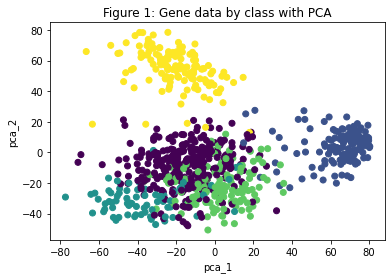

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(transformed_x[:, 0], transformed_x[:, 1], c=y)
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_title(f'Figure 1: Gene data by class with PCA')

In [17]:
from sklearn.manifold import TSNE

In [18]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [19]:
X_embedded.shape

(795, 2)

Text(0.5, 1.0, 'Figure 1: Gene data by class with TSNE')

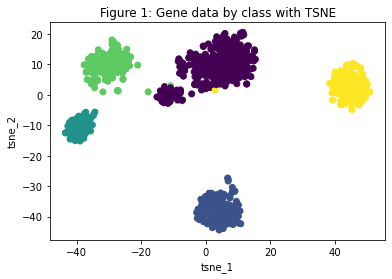

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
ax.set_title(f'Figure 1: Gene data by class with TSNE')

1. EDA
2. DIMENSIONALITY REDUCTION
3. VISUALIZATION


In [ ]:
def distance(arr, oth_arr, type='euclidean'):
    k = oth_arr.shape[0]
    n = arr.shape[0]
    diff_matrix = np.zeros((k, n))
    if type=='euclidean':
        for i in range(k):
            diff = (arr - oth_arr[i])
            diff_prod = diff.dot(diff.T)
            diff_matrix[i] = np.sqrt(diff_prod[np.diag_indices(n)])
    if type=='manhattan':
        for i in range(k):
            diff = abs(arr - oth_arr[i])
            diff_matrix[i] = np.sum(diff, axis=1)
            
    return diff_matrix.T


def kmeans(X, k):
    n = X.shape[0]
    centroids = X[np.random.randint(0, n, k), :]
    num_iter = 300
    labels = np.argmin(distance(X, centroids), axis=1)
    for iter in range(num_iter):
        for i in range(k):
            centroids[i] = X[np.where(labels==i)[0],:].mean(axis=0)
        new_labels = np.argmin(distance(X, centroids), axis=1)
        if np.array_equal(labels, new_labels):
            return labels
        labels = new_labels
    return labels

In [ ]:
def distance(arr, type='euclidean'):
    n = arr.shape[0]
    diff_matrix = np.zeros((n,n))
    if type=='euclidean':
        for i in range(n):
            diff = (arr - arr[i])
            diff_prod = diff.dot(diff.T)
            diff_matrix[i] = np.sqrt(diff_prod[np.diag_indices(n)])
    return diff_matrix
def spectral_clustering_laplace_norm(X, sigma=0.3, k=3):
    pairwise_differences = distance(X)
    # Constructing similarity graph 
    similarity_graph = np.exp(-(pairwise_differences)/(2*sigma**2))
    # Computing normalized Laplacian
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=similarity_graph, normed=True)
    L_norm_cov = np.cov(graph_laplacian_s)
    eig_val, eig_vectors = eigh(L_norm_cov)
    X = eig_vectors[:, :k]
    X_normalized =  preprocessing.normalize(X, norm='l2')
    model = KMeans(n_clusters=k)
    labels_norm = model.fit_predict(X_normalized)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(df['A'], df['B'], c=labels_norm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Figure 1: Relation between Variables, labeled using spectral clustering with sigma={sigma}')
    return labels_norm